Name: Ahmed Ameen Uddin

Data Analytics Intern Assignment


In [1]:
import pandas as pd

user_details = pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx", sheet_name="UserDetails.csv")


In [2]:
print(user_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [3]:
print(user_details.duplicated().sum())


0


In [4]:
user_details["Registration Date"] = pd.to_datetime(user_details["Registration Date"])


In [5]:
user_details["Location"] = user_details["Location"].str.title()
user_details["Favorite Meal"] = user_details["Favorite Meal"].str.capitalize()


In [6]:
print(user_details["Age"].describe())


count    10.000000
mean     31.800000
std       5.266245
min      25.000000
25%      28.250000
50%      30.500000
75%      34.500000
max      42.000000
Name: Age, dtype: float64


In [7]:
user_details = user_details[user_details["Age"] > 0]


In [8]:
user_details.to_csv("Cleaned_UserDetails.csv", index=False)


In [9]:
cooking_sessions = pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx", sheet_name="CookingSessions.csv")


In [10]:
print(cooking_sessions.isnull().sum())


Session ID         0
User ID            0
Order ID           0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [11]:
print(cooking_sessions.duplicated().sum())


0


In [12]:
cooking_sessions["Session Start"] = pd.to_datetime(cooking_sessions["Session Start"])
cooking_sessions["Session End"] = pd.to_datetime(cooking_sessions["Session End"])


In [13]:
cooking_sessions["Meal Type"] = cooking_sessions["Meal Type"].str.capitalize()
cooking_sessions["Dish Name"] = cooking_sessions["Dish Name"].str.title()


In [14]:
cooking_sessions = cooking_sessions[cooking_sessions["Duration (mins)"] > 0]


In [15]:
cooking_sessions = cooking_sessions[(cooking_sessions["Session Rating"] >= 1) & (cooking_sessions["Session Rating"] <= 5)]


In [16]:
cooking_sessions.to_csv("Cleaned_CookingSessions.csv", index=False)


In [17]:
order_details = pd.read_excel("/content/Data Analyst Intern Assignment - Excel.xlsx", sheet_name="OrderDetails.csv")


In [18]:
print(order_details.isnull().sum())


Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [21]:
print(order_details.duplicated().sum())
order_details = order_details.drop_duplicates()


0


In [22]:
order_details["Order Date"] = pd.to_datetime(order_details["Order Date"])


In [23]:
order_details["Meal Type"] = order_details["Meal Type"].str.capitalize()
order_details["Dish Name"] = order_details["Dish Name"].str.title()


In [24]:
order_details["Order Status"] = order_details["Order Status"].str.capitalize()


In [25]:
order_details = order_details[order_details["Amount (USD)"] > 0]


In [26]:
order_details = order_details[(order_details["Rating"] >= 1) & (order_details["Rating"] <= 5) | order_details["Rating"].isnull()]


In [27]:
order_details.to_csv("Cleaned_OrderDetails.csv", index=False)


In [41]:

merged_data_1 = pd.merge(cooking_sessions, user_details, on="User ID", how="inner")


final_merged_data = pd.merge(merged_data_1, order_details, on="Order ID", how="inner")


In [29]:
print(final_merged_data.shape)


(16, 26)


In [30]:
print(final_merged_data.head())


  Session ID_x User ID_x  Order ID      Dish Name_x Meal Type_x  \
0         S001      U001      1001        Spaghetti      Dinner   
1         S002      U002      1002     Caesar Salad       Lunch   
2         S003      U003      1003  Grilled Chicken      Dinner   
3         S005      U004      1004     Caesar Salad       Lunch   
4         S007      U005      1005  Grilled Chicken      Dinner   

        Session Start         Session End  Duration (mins)  Session Rating  \
0 2024-12-01 19:00:00 2024-12-01 19:30:00               30             4.5   
1 2024-12-01 12:00:00 2024-12-01 12:20:00               20             4.0   
2 2024-12-02 19:30:00 2024-12-02 20:10:00               40             4.8   
3 2024-12-03 13:00:00 2024-12-03 13:15:00               15             4.7   
4 2024-12-04 18:00:00 2024-12-04 18:45:00               45             4.6   

       User Name  ...  Total Orders User ID_y Order Date Meal Type_y  \
0  Alice Johnson  ...            12      U001 2024-12-01

In [31]:
final_merged_data.to_csv("Merged_Dataset.csv", index=False)


In [32]:
print(final_merged_data[["Session Rating", "Rating"]].corr())


                Session Rating   Rating
Session Rating         1.00000 -0.02983
Rating                -0.02983  1.00000


In [36]:
# Check if 'Dish Name' or similar column names exist in the DataFrame
print(final_merged_data.columns)

# If the column name is misspelled or has different casing, correct it
# Example: If the column name is 'dish_name', change it to 'Dish Name'
# final_merged_data = final_merged_data.rename(columns={'dish_name': 'Dish Name'})

# If the column is missing, investigate the merge operations to ensure it's included
# You might need to adjust the merge keys or how='inner' parameter

Index(['Session ID_x', 'User ID_x', 'Order ID', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email',
       'Favorite Meal', 'Total Orders', 'User ID_y', 'Order Date',
       'Meal Type_y', 'Dish Name_y', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating', 'Session ID_y'],
      dtype='object')


In [38]:
popular_dishes = final_merged_data["Dish Name_x"].value_counts()
print(popular_dishes)


Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Veggie Burger      2
Pancakes           2
Oatmeal            1
Name: count, dtype: int64


In [34]:
demographic_analysis = final_merged_data.groupby("Location")["Total Orders"].mean()
print(demographic_analysis)


Location
Austin            7.0
Boston           14.0
Chicago          15.0
Los Angeles       8.0
Miami             5.0
New York         12.0
San Francisco    10.0
Seattle           9.0
Name: Total Orders, dtype: float64


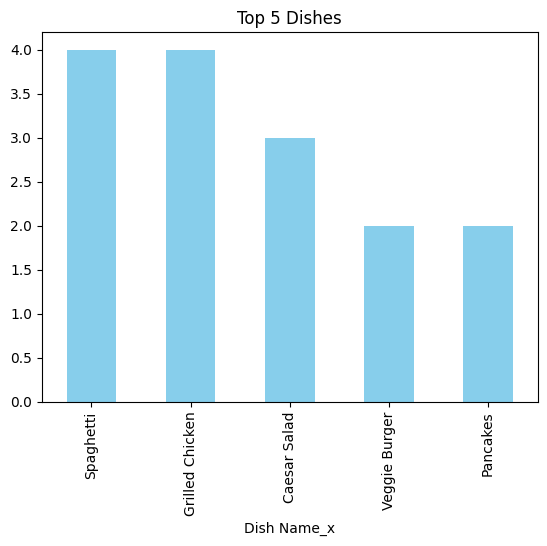

In [39]:
import matplotlib.pyplot as plt

popular_dishes.head(5).plot(kind="bar", title="Top 5 Dishes", color="skyblue")
plt.show()


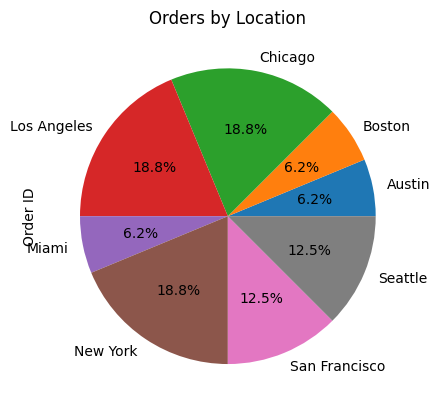

In [40]:
final_merged_data.groupby("Location")["Order ID"].count().plot(kind="pie", title="Orders by Location", autopct="%1.1f%%")
plt.show()
